<a href="https://colab.research.google.com/github/MabelOlivia/Machine-Learning/blob/master/Exploratory%20Data%20Analysis/Data_Science_East_Africa_Data_Analysis_BootCamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Understanding the Problem

The RMS Titanic was a luxury British steamship that sank in the early hours of April,15 1912 after striking an iceberg leading to the deaths of more than 1500 passengers and crew. Of the 2240 passengers and crew on board, more than 1500 lost their lives in the disaster.

The Titanic started its maiden voyage from Southampton, England on April,10, 1912. After stops in Cherbough, France and Queenstown, Ireland, the ship set sail for New York with 2,240 passengers and crew. The ship had high-ranking officials, wealthy industrialists, dignitaries and celebrities. 706 people survived the sinking of the Titanic.

Titanic nearly perpendicular and many of her lights still aglow finally dove beneath the oceans surface at about 02:20 am on April 15,1972.

## Understanding the Columns

Column Description:

*  Survived : This shows whether the individual survived or not.(0 = No; 1 = Yes)
*  Pclass : This shows the socio-economic class of the passenger where the first class shows a fairly stable economic individual while the third class shows a less stable economic individual. (1 = 1st Class, 2 = 2nd Class, 3 = 3rd Class)
*  Name : This shows the name of the individual.
*  Sex : This shows the gender of the individual.
*  Age : This column shows the estimate of the ages of the individual.
*  Sibsp : This column shows the number of siblings/ spouses on board.
*  Parch : This columns shows the number of parents/childern on board.
*  Ticket Number : This shows the ticket number of the passenger on board.
*  Fare : This column shows the amount of transport money the individual paid.
*  Cabin : This shows the cabin or area one was in during the voyage.
*  Embarked : This column shows the port where the individual embarked on; C representing Cherbough, Q representing Queenstown, S representing Southampton.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/DS/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature Engineering

In [ ]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [ ]:
df = df.drop(['SibSp','Parch'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1


In [ ]:
df = df.drop(['Ticket'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,NaN,S,1


In [ ]:
df = df.set_index('PassengerId')

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,family_size
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,NaN,S,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,NaN,S,1


In [ ]:
df['title'] = df['Name'].str.extract(r',\s*([^\.]*)\s*\.',expand=False)

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,family_size,title
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,NaN,S,2,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C,2,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,NaN,S,1,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S,2,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,NaN,S,1,Mr


In [ ]:
df = df.drop(['Name'],axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,family_size,title
PassengerId,,,,,,,,,
1,0,3,male,22.0,7.2500,NaN,S,2,Mr
2,1,1,female,38.0,71.2833,C85,C,2,Mrs
3,1,3,female,26.0,7.9250,NaN,S,1,Miss
4,1,1,female,35.0,53.1000,C123,S,2,Mrs
5,0,3,male,35.0,8.0500,NaN,S,1,Mr


## Data Cleaning

In [ ]:
df.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
Cabin          687
Embarked         2
family_size      0
title            0
dtype: int64

In [ ]:
df.shape

(891, 9)

In [ ]:
df = df.drop(['Cabin'],axis=1)

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       2
family_size    0
title          0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(889, 8)

In [ ]:
df.dtypes

Survived         int64
Pclass           int64
Sex             object
Age            float64
Fare           float64
Embarked        object
family_size      int64
title           object
dtype: object

In [ ]:
df['Embarked'] = df['Embarked'].astype('category')
df.dtypes

Survived          int64
Pclass            int64
Sex              object
Age             float64
Fare            float64
Embarked       category
family_size       int64
title            object
dtype: object

In [ ]:

df['title'] = df['title'].astype('category')

In [ ]:
df.dtypes

Survived          int64
Pclass            int64
Sex              object
Age             float64
Fare            float64
Embarked       category
family_size       int64
title          category
dtype: object

## Data Analysis

#### Univariate Analaysis

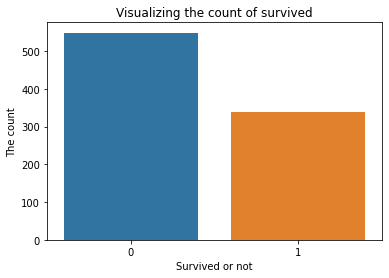

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=df)
plt.xlabel("Survived or not")
plt.ylabel('The count')
plt.title("Visualizing the count of survived")
plt.show()

The people who died in the Titanic are more than the people who survived.

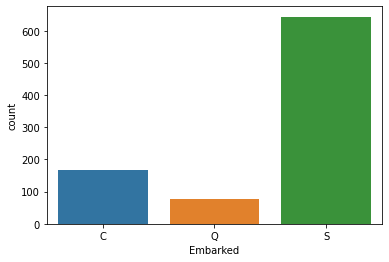

In [ ]:
sns.countplot(x ='Embarked', data=df)
plt.show()

In [ ]:
df['Age'].mean()

29.653446370674192

In [ ]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: category
Categories (3, object): ['C', 'Q', 'S']

## Bivariate Analysis

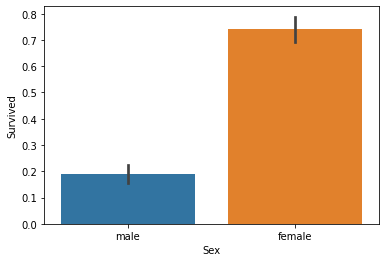

In [ ]:
df_1 = df.groupby('Survived').count()
df_1 = df_1.reset_index(inplace=True)

sns.barplot(x = df['Sex'], y = df['Survived'], data=df_1)

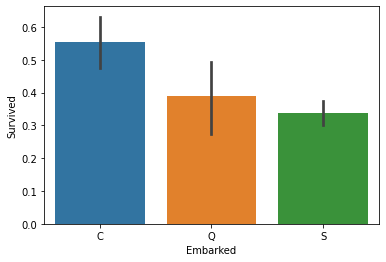

In [ ]:
df_2 = df.groupby('Survived').count()
df_2 = df_2.reset_index(inplace=True)

sns.barplot(x = df['Embarked'], y = df['Survived'], data=df_2)

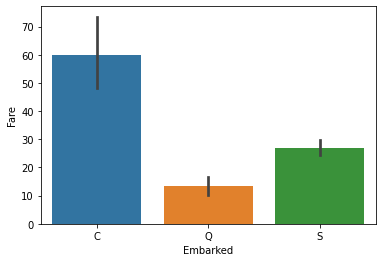

In [ ]:
df_2 = df.groupby('Embarked').mean()
df_2 = df_2.reset_index(inplace=True)

sns.barplot(x = df['Embarked'], y = df['Fare'], data=df_2)

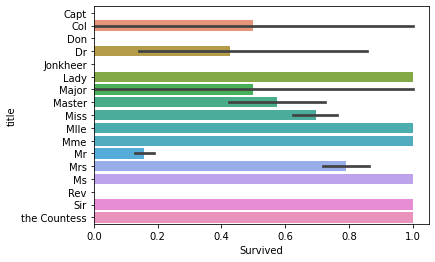

In [ ]:
df_3 = df.groupby('Survived').count()
df_3 = df_3.reset_index(inplace=True)

sns.barplot(x = df['Survived'], y = df['title'], data=df_3)

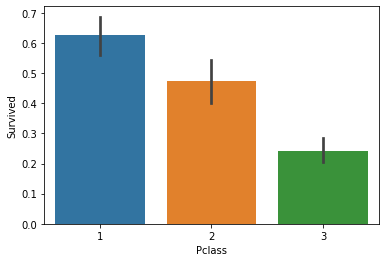

In [ ]:
df_2 = df.groupby('Survived').count()
df_2 = df_2.reset_index(inplace=True)

sns.barplot(x = df['Pclass'], y = df['Survived'], data=df_2)

In [ ]:
df.corr()

,Survived,Pclass,Age,Fare,family_size
Survived,1.000000,-0.335549,-0.074673,0.255290,0.018277
Pclass,-0.335549,1.000000,-0.327954,-0.548193,0.064221
Age,-0.074673,-0.327954,1.000000,0.088604,-0.247546
Fare,0.255290,-0.548193,0.088604,1.000000,0.218658
family_size,0.018277,0.064221,-0.247546,0.218658,1.000000
